In this notebook, I analyze NBA draft combine data in hopes to identify the most important predictor for future success in the NBA.  I start with data from Andrew Chou on data.world.  If this data does not provide conclusive results, I will have to find more data.

In [187]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from random import seed
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

First, we read our data into a DataFrame object.

In [188]:
all_combine_data = pd.read_csv("combine 2009 to 2017.csv")
all_combine_data

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


Before we do anything, we have to understand the meaning of these numbers.  The source of the data gives us the following key:    
  
Year: The year they were drafted.    
Draft Pick: A number from 1 to 60.  Lower indicates they were selected before (i.e. more desireable) than higher numbers.  
Height (w/ and w/o shoes): Measured in Inches  
Wingspan: Measured in Inches  
Standing Reach: Measured in Inches  
Vertical (Max): How much air a player can get on a jump with a step before jumping, in inches.  
Vertical (Max Reach): How high a player can reach on a jump with a step before jumping, in inches.  
Vertical (No Step): How much air a player can get on a jump with no step before jumping, in inches.  
Vertical (No Step Reach): How high a player can reach on a jump with no step before jumping, in inches.  
Weight: In pounds.  
Body Fat: As a pencentage.  
Hand (Length): From base of the palm to the end of fingers, in inches.  
Hand (Width): Width of the hand, in inches.  
Bench: The amount of reps completed of 185 pound weight.  
Agility: The time taken, in seconds, to shuffle around the painted area.  
Sprint: The time taken to sprint 3/4 of a basketball court.  


There are a lot of things to keep an eye on.  First are the amounts of NaN values throughout.  From the above data frame, it looks like the hand length, hand width, and bench attributes are most filled with NaN values.  Let's see if that's true.

In [189]:
all_combine_data.isnull().sum(axis = 0)

Unnamed: 0                    0
Player                        0
Year                          0
Draft pick                  133
Height (No Shoes)             0
Height (With Shoes)           1
Wingspan                      0
Standing reach                0
Vertical (Max)               67
Vertical (Max Reach)         67
Vertical (No Step)           67
Vertical (No Step Reach)     67
Weight                        1
Body Fat                      3
Hand (Length)                47
Hand (Width)                 49
Bench                       233
Agility                      73
Sprint                       71
dtype: int64

It definitely looks like Bench is the most empty.  So let us drop that column.

In [190]:
all_combine_data = all_combine_data.drop(['Bench'], axis = 1)
all_combine_data = all_combine_data.drop(['Year'], axis = 1)
all_combine_data = all_combine_data.drop(['Unnamed: 0'], axis = 1)

Now, I am sure there are entries that have a lot of null values.  Let's see.

In [191]:
row_nulls = all_combine_data.apply(lambda x: 19 - x.count(), axis = 1)
row_nulls

0       5
1       5
2       5
3       5
4       5
       ..
512     4
513     4
514     4
515    10
516     4
Length: 517, dtype: int64

In [192]:
row_nulls.value_counts(sort = False)

3     285
4     114
5      44
6       8
9      48
10     14
11      3
13      1
dtype: int64

From above, we see that 285 entries have three null values.  The rest have more.  For this beginning analysis, let's remove any entries with more than 3 null values.  Also, the collection of entries with three null values probably share the locations of those three nulls.  Thus, if we remove the three bad columns, we should end up with 285 entries with no null values.

In [193]:
list_of_null_numbers = all_combine_data.isna().sum(axis=1).tolist()

In [194]:
all_combine_data = all_combine_data.dropna()
all_combine_data.reset_index(drop = True, inplace = True)
all_combine_data

,Player,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
0,Damion James,24.0,78.25,79.50,84.75,106.0,37.0,143.0,30.0,136.0,224.0,8.2,9.25,8.50,11.23,3.09
1,Greivis Vasquez,28.0,76.75,78.00,79.25,101.0,28.0,129.0,24.5,125.5,197.0,6.9,7.75,9.25,11.13,3.48
2,Gani Lawal,46.0,79.75,81.00,84.00,106.0,34.5,140.5,30.0,136.0,229.0,7.2,8.50,10.00,11.93,3.34
3,Luke Harangody,52.0,78.25,80.00,81.75,106.0,31.0,137.0,27.0,133.0,240.0,11.2,8.75,9.75,11.15,3.33
4,John Wall,1.0,74.75,76.00,81.25,101.5,39.0,140.5,30.0,131.5,196.0,5.6,8.25,9.50,10.84,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Ike Anigbogu,47.0,80.50,81.75,90.25,110.5,32.5,143.0,29.5,140.0,252.0,5.4,9.50,10.00,12.52,3.44
281,Sindarius Thornwell,48.0,75.50,76.75,82.00,103.0,30.5,133.5,27.0,130.0,212.0,7.8,8.75,8.75,11.48,3.36
282,Monte Morris,51.0,73.25,74.50,76.00,96.5,33.5,130.0,28.0,124.5,175.0,6.9,8.25,8.75,11.00,3.19
283,Kadeem Allen,53.0,73.00,74.25,81.25,99.5,35.5,135.0,33.0,132.5,192.0,6.4,8.50,8.75,11.24,3.15


This is the most simplified version of data cleaning.  It ensures no null values, but it also slimmed down our data set by half, and our dataset was not very large to begin with.  If we cannot get results with this, we will have to come back to this step and be more careful.

  
The first thing I want to investigate is how combine stats affect draft pick if at all.  Let's treat the problem as a regression problem (having the other variables predict the draft pick)

In [195]:
train, test = train_test_split(all_combine_data, test_size = 0.2, random_state = 42)

Now that we have our training and test data split up, we need to decide which model to use.
First, I will try simple linear regression.

In [196]:
train_X = train.drop(["Draft pick", "Player"], axis = 1)
train_y = train["Draft pick"].copy()
test_X = test.drop(["Draft pick", "Player"], axis = 1)
test_y = test["Draft pick"].copy()

In [197]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
test_predictions = lin_reg.predict(test_X)
mse = mean_squared_error(test_y, test_predictions)
rmse = np.sqrt(mse)
rmse

14.525103177724192

Evidently, using a linear based model is good enough to predict draft spot within about 15 places, on average.  Let's quickly try a decision tree model on this data.

In [199]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [200]:
tree_test_predictions = tree_reg.predict(test_X)
mse_tree = mean_squared_error(test_y, tree_test_predictions)
rmse_tree = np.sqrt(mse_tree)
rmse_tree

20.285246561729917

This seems to actually be worse.  Let's try a random forest.

In [201]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_X, train_y)

C:\Users\User\Anaconda3\envs\nba_combine\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [202]:
forest_test_predictions = forest_reg.predict(test_X)
mse_forest = mean_squared_error(test_y, forest_test_predictions)
rmse_forest = np.sqrt(mse_forest)
rmse_forest

14.622021364090871

This is about as good as the linear model.  Let's compare all of these with a random guesser, which randomly guesses a value between 1 and 60 inclusive.

In [203]:
seed(1)
list = []
for _ in range(57):
    value = randint(1,60)
    list.append(value)
print(list)

[9, 37, 55, 52, 49, 5, 17, 8, 32, 49, 29, 31, 42, 25, 51, 14, 7, 32, 2, 58, 54, 25, 28, 39, 49, 50, 1, 45, 29, 18, 47, 52, 15, 38, 7, 58, 21, 2, 2, 2, 42, 35, 1, 57, 25, 44, 14, 28, 47, 2, 34, 15, 49, 29, 32, 36, 15]


In [204]:
mse_random = mean_squared_error(test_y, list)
rmse_random = np.sqrt(mse_random)
rmse_random

25.227734668242174

This is a good sign.  If the models were just as good as randomly guessing the draft pick, there would be no point in creating models!  Maybe we can improve the performance of the models by fine-tuning them.  Before we do that, let's investigate the relationships between our attributes in a little more detail.  First, let's compute the Pearson's r (correlation coefficient) between all attributes.

In [205]:
pearson_matrix = all_combine_data.corr()

We really care how all the attributes are correlated with the 'Draft pick' attribute:

In [206]:
pearson_matrix['Draft pick'].sort_values(ascending=False)

Draft pick                  1.000000
Sprint                      0.179595
Agility                     0.134505
Body Fat                    0.025616
Vertical (No Step)         -0.042398
Vertical (Max)             -0.047175
Weight                     -0.115229
Height (With Shoes)        -0.135034
Height (No Shoes)          -0.135566
Hand (Width)               -0.149553
Standing reach             -0.152935
Wingspan                   -0.158861
Hand (Length)              -0.167134
Vertical (No Step Reach)   -0.193627
Vertical (Max Reach)       -0.224243
Name: Draft pick, dtype: float64

At first glance, these can seem confusing.  It's important to realize that since a lower draft pick is better and a larger vertical is better, there is some evidence that vertical *reaches* provide the biggest indication for draft selection.  
At the same time, since lower sprint and agility times are better, there is some evidence that those times can provide some indication for draft selection.  Most of the values with negative correlation coefficient are better the larger they are (which is why have a negative correlation coefficient).  
It's most revealing to see which variable are not very correlated which include regular verticals and body fat percentage.  
  
  
Let's create some plots with the most promising attributes: Vertical (Max Reach), Sprint, and Hand (Length).

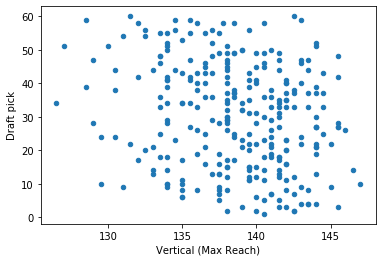

In [207]:
all_combine_data.plot.scatter("Vertical (Max Reach)", "Draft pick")

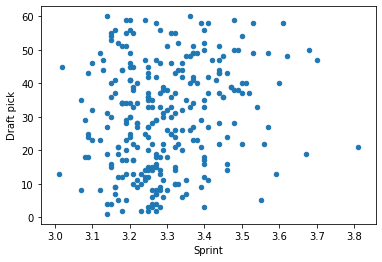

In [208]:
all_combine_data.plot.scatter("Sprint", "Draft pick")

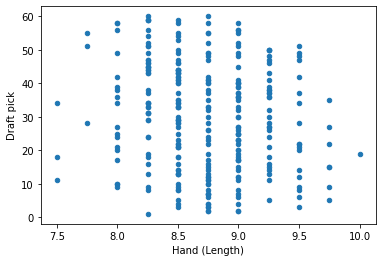

In [209]:
all_combine_data.plot.scatter("Hand (Length)", "Draft pick")

The positive and negative correlations are clear enough visually, but they will not be strong enough to very accurately predict draft selection.  
  
Now that we have a better idea of the relationship between the various attributes, let us try to optimize our model.  First, we will perform feature scaling on our X data (scaling target values are not required).  We are going to use standardization for this task.

In [210]:
std_scaler = StandardScaler()

In [211]:
std_scaler.fit(train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [212]:
print(std_scaler.mean_, std_scaler.var_, std_scaler.n_samples_seen_)

[ 77.59868421  78.90241228  82.49824561 103.04934211  35.45175439
 138.50109649  29.95175439 133.00109649 213.89473684   7.01754386
   8.72149123   9.38048246  11.31258772   3.29912281] [9.61745441e+00 9.53406216e+00 1.38543171e+01 2.18399447e+01
 1.21621460e+01 1.62787817e+01 9.31346183e+00 1.98336063e+01
 5.97331025e+02 5.40276239e+00 2.19033741e-01 5.29849329e-01
 2.87478830e-01 1.58334411e-02] 228


The standard scaler appears to be working correctlty.  It found the mean and standard deviation of all the attributes.  So now, we just need to transform both the training and testing data.

In [213]:
train_X = std_scaler.fit_transform(train_X)
test_X = std_scaler.fit_transform(test_X)

In [214]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(train_X, train_y)
test_predictions_scaled = lin_reg_scaled.predict(test_X)
mse_scaled = mean_squared_error(test_y, test_predictions_scaled)
rmse_scaled = np.sqrt(mse_scaled)
rmse_scaled

14.676087113772295

Standard scaling doesn't seem to do us any good (probably because the scaling of the original variables was not very different to begin with).  At this point, we would usually fine-time our model's hyper parameters by doing a Grid Search, but our best model, the linear regression model, doesn't have any hyper parameters.  The only other thing to try is regularization.
  
  
Which regularization should we use?  The options are ridge, lasso, and elastic net and they each have their stengths and weaknesses.  Earlier, we found that some attributes are strongly correlated, which indicates that Lasso regularization is not preferred.  Elastic net regularization will be our choice since some features are not very useful, and elastic net performs well in these situations.

In [215]:
net = ElasticNet(alpha=0.1, l1_ratio=0.5)
net.fit(train_X, train_y)
test_predictions_scaled_netted = net.predict(test_X)
mse_scaled_netted = mean_squared_error(test_y, test_predictions_scaled_netted)
rmse_scaled_netted = np.sqrt(mse_scaled_netted)
rmse_scaled_netted

14.530413934493659

This does not do us much good.  In conclusion, it appears that a linear regression model performs better than the decision tree and random forest models.  Using the linear regression models, we can predict draft selection within about 15 places.  The most important attributes for determining draft selection are Vertical reaches and Agility, and the least important are body fat percentages and verticals.

This was just the beginning analysis on the problem.  Further things to improve on:

1: We need more data.  Either by scraping draft websites or finding other pre-built datasets.
  
  2: If we can get a find a good measure for nba performance for the players in this dataset, then we can see if combine drills can predict nba performance, not just draft selection.